AIM:-
Ensemble Learning: Write a program to implement the Adaboost algorithm with decision tree as the base classifier. The decision tree implemented as a function. Run Adaboost for 3 rounds. The combined classifier should be tested on test instances and the accuracy of prediction for the test instances should be printed as output. A single program should train the classifier on the training set as well as test it on the test set.

In [1]:
# importing required libraries
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Collection
df = pd.read_csv("..//breast-cancer.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of the Breast_Cancer dataset:-\n", df.head())

First 5 rows of the Breast_Cancer dataset:-
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_wo

In [3]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  569
No. of column in the dataset:  32


In [4]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          

In [5]:
# Data Preprocessing
# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Finding Unique categories of diagnosis column
print("Types of Cancer: ", df['diagnosis'].unique())

Types of Cancer:  ['M' 'B']


In [7]:
# Mapping with integer values
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
print("Checking Dataset after mapping:-\n", df.tail())

Checking Dataset after mapping:-
          id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424          0        21.56         22.39          142.00     1479.0   
565  926682          0        20.13         28.25          131.20     1261.0   
566  926954          0        16.60         28.08          108.30      858.1   
567  927241          0        20.60         29.33          140.10     1265.0   
568   92751          1         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  

In [8]:
# Split the dataset into independent and dependent feature
X = df.iloc[:, 1:]  # features
y = df.iloc[:, 1]  # target variable    (diagnosis: 2nd column)

In [9]:
# Split the dataset into training and testing sets(80% training, 20%testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Function to create a decision tree classifier
def create_decision_tree():
    return DecisionTreeClassifier(max_depth=1)

In [11]:
# Function to implement Adaboost with decision tree as base classifier
def adaboost(X_train, y_train, X_test, y_test, rounds=3):
    # Initialize Adaboost classifier with decision tree as base estimator
    clf = AdaBoostClassifier(estimator=create_decision_tree(), n_estimators=rounds)

# Train the Adaboost classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_predict = clf.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_predict)
    print(f"Accuracy after {rounds} rounds of Adaboost: {accuracy}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_predict)
    # Plot a beautiful confusion matrix
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, square=True,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

Accuracy after 3 rounds of Adaboost: 1.0


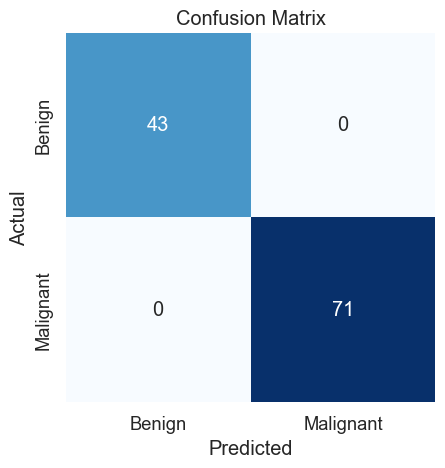

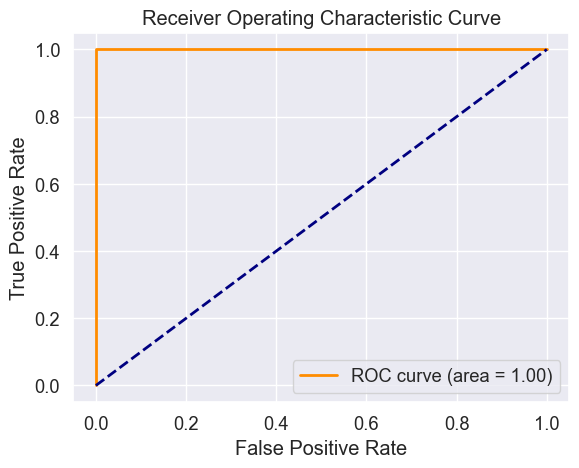

In [12]:
# Run Adaboost for 3 rounds
adaboost(X_train, y_train, X_test, y_test, rounds=3)